In [26]:
import sys
import re
import pandas as pd
from sqlalchemy import create_engine

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import plotly.tools as tls

In [7]:
def tokenize(text):
    """Tokenize a text

    Parameters:
    text (sting): text to be tokenized

    Returns:
    List: List of tokens

    """
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

    # tokenize text
    tokens = word_tokenize(text)

    # lemmatize andremove stop words
    stop_words = stopwords.words("english")
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

In [2]:
engine = create_engine('sqlite:///../data/DisasterResponse.db')
df = pd.read_sql_table('disaster_message_category', engine)

In [9]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
word_string = " ".join(df['message'])
word_string_final = " ".join(tokenize(word_string))

In [51]:
wordcloud = WordCloud(width = 800, height = 400, background_color='white', max_words=300).generate(word_string_final)

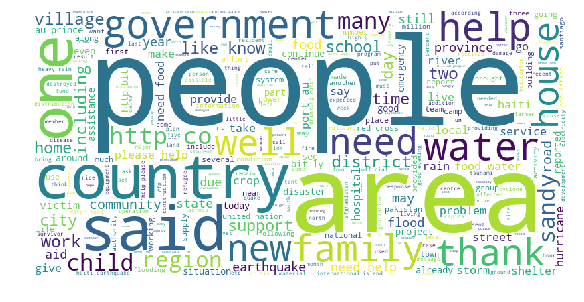

In [61]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('wordcloud.png', dpi=105)  
plt.show()